Diagram of the neural network which is going to be implemented

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Input and output

In [2]:
X = np.array([[1, 1, 0, 1], [1, 0, 0, 1], [0, 1, 1, 1], [0, 0, 1, 0], [1, 0, 0, 0]])
y = np.array([[1, 0, 1, 1, 0]]).T
print('X =\n', X, '\n\ny =\n', y)

X =
 [[1 1 0 1]
 [1 0 0 1]
 [0 1 1 1]
 [0 0 1 0]
 [1 0 0 0]] 

y =
 [[1]
 [0]
 [1]
 [1]
 [0]]


### Diagram of a neural network which will be implemented

<img src="NN.jpg" alt="Drawing" style="width: 700px;"/>

### Random weights intialization

In [13]:
def weights_init():
    np.random.seed(5)
    w1 = np.random.rand(4,5)
    w2 = np.random.rand(5,5)
    w3 = np.random.rand(5,1)
    return w1, w2, w3

### Activation function and its derivative
I will use sigmoid function returning values in range 0 to 1

In [4]:
def sig(x):
    return 1/(1 + np.exp(-x))

def sig_deriv(x):
    return x*(1-x)

### Forward propagation

In [5]:
def fp(w1, w2, w3, X):
    z1 = np.dot(X,w1)
    a1 = sig(z1)
    
    z2 = np.dot(a1,w2)
    a2 = sig(z2)
    
    z3 = np.dot(a2,w3)
    a3 = sig(z3)
   
    return a1, a2, a3

### Back propagation

In [6]:
def bp(a1, a2, w2, a3, w3, X, y):
    
    da3 = y - a3
    dz3 = da3 * sig_deriv(a3)
    
    da2 = np.dot(dz3, w3.T)
    dz2 = da2 * sig_deriv(a2)
    
    da1 = np.dot(dz2,w2.T)
    dz1 = da1 * sig_deriv(a1)
    
    return dz1, dz2 ,dz3, da3

### Updating weights

In [7]:
def update_weights(w1, a1, dz1, w2, a2, dz2, w3, dz3, X):
    w1 += np.dot(X.T, dz1)
    w2 += np.dot(a1.T, dz2)
    w3 += np.dot(a2.T, dz3)
    
    return w1, w2, w3

### Learning loop function

In [8]:
def learn(w1, w2, w3, X, y, epochs):
    
    error = []
    for i in range(epochs):
        
        a1, a2, a3 = fp(w1, w2, w3, X)
       
    
        dz1, dz2, dz3, da3 = bp(a1, a2, w2, a3, w3, X, y)
        
        error.append(abs(np.mean(da3)))
        if i%(epochs/10) == 0:
            print('error: ', error[i])
        
        w1, w2, w3 = update_weights(w1, a1, dz1, w2, a2, dz2, w3, dz3, X)
    
    plt.plot(range(epochs)[:50], error[:50])
    plt.xlabel('epoch')
    plt.ylabel('error')
    plt.title('Learning curve')

### Training the model

error:  0.33111132524063674
error:  0.0016081610065543192
error:  0.0010373395283288938
error:  0.0008253048268804294
error:  0.000706888928122966
error:  0.000628830270434896
error:  0.0005724343541689198
error:  0.0005292360851196526
error:  0.0004947756706032011
error:  0.00046645220557730937


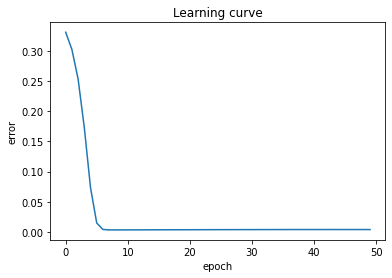

In [18]:
w1, w2, w3 = weights_init()
learn(w1, w2, w3, X, y, 5000)

Now i can check if the algorithm worked properly

In [22]:
l1, l2, l3 = fp(w1, w2, w3, X)
print('results =\n', l3, '\ny =\n', y)

results =
 [[0.99262454]
 [0.00769472]
 [0.99710149]
 [0.9944753 ]
 [0.00589078]] 
y =
 [[1]
 [0]
 [1]
 [1]
 [0]]


As we can se the results are highly satisfying - values almost identical to 'y'